# Recommender System user-data creation

We want to create a population where a certain percentage of the people have a sensitivity to some specific food. 

The code below creates an n user dataset with x number of foods they have eaten. There is a target collumn that specifies which food they are sensitive to.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
n = 10000    # population size
p = 0.05    # probability person has a food sensitivity
user_id = np.arange(n)    # user id array

We will create a list of foods. If a person has a food sensitivity we will randomly select (from a uniform distribution) which food they are sensitive to.

In [52]:
x = np.random.binomial(1,p,size = n)  # this x array will trigger which person has a food sensitivity 
food_list = ['wheat','corn','dairy','beef','chicken','rice','apple','potatoes','broccoli','carrots'] 

In [53]:
target = []
for items in x:
    if items == 1:
        target.append(food_list[np.random.randint(len(food_list))])
    else:
        target.append('none')

### distribution of ratings based on sensitivity to specific food
Now that we have a list of foods and a food that the user is sensitive to we will distribute "wellness" ratings based on the food eaten.  For now all users have eaten all foods 


In [45]:
    poss_ratings = np.arange(1,6)  # create ratings 1-5
    none_likely = 4                # likelihood of rating if not sensitive
    sense_likely = 2               # likelihood of raiting if sensitive
    how_likely = 3                 # how much more likely
    total = len(poss_ratings) + how_likely-1
    
    # probability arrays for sensitive and not sensitive
    prob_none = [1/total if x != none_likely else how_likely/total for x in poss_ratings ]  
    prob_sens = [1/total if x != sense_likely else how_likely/total for x in poss_ratings]

In [6]:
def rate_it(food,food_list):
    """
    Creates an array of ratings based on a weighted probability of choosing a specific rating
    1. food = food that user is sensitive to
    2. food_list = list of foods available to eat
         - compare food to food list
         - if food is on the list chose from the sensitivity probability array for making a rating
         - else chose from the none probability array for making a rating
    """
    ratings = []
    for items in food_list:
        if items == food:
            ratings.append(np.random.choice(poss_ratings,p=prob_sens))
        else:
            ratings.append(np.random.choice(poss_ratings,p=prob_none))
    
    return ratings

Create a user ratings matrix 

In [54]:
user_ratings = np.zeros((len(user_id),len(food_list)))
                        
for user in range(len(user_id)):
    food = target[user]
    ratings = rate_it(food,food_list)
    user_ratings[user,:] = ratings                    
    

And Finally, create a dataframe of user food ratings

In [55]:
user_ratings.shape

(10000, 10)

In [56]:
user_data = pd.DataFrame(data=user_ratings, index= user_id, columns=food_list)
user_data['target'] = target

In [57]:
user_data.head()

,wheat,corn,dairy,beef,chicken,rice,apple,potatoes,broccoli,carrots,target
0,5.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,5.0,none
1,4.0,4.0,2.0,5.0,4.0,3.0,4.0,5.0,4.0,2.0,none
2,5.0,4.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,none
3,1.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,none
4,4.0,5.0,1.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,none


In [58]:
user_data.describe()

,wheat,corn,dairy,beef,chicken,rice,apple,potatoes,broccoli,carrots
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.281900,3.278000,3.302100,3.292800,3.290300,3.287300,3.300900,3.284300,3.289100,3.285600
std,1.275067,1.276589,1.272791,1.274845,1.276475,1.287915,1.268274,1.272335,1.276434,1.281716
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [59]:
# show the average rating for each target sensitivity
by_targ = user_data.groupby('target')
by_targ.mean()

,wheat,corn,dairy,beef,chicken,rice,apple,potatoes,broccoli,carrots
target,,,,,,,,,,
apple,2.940000,3.240000,3.340000,3.420000,3.480000,3.180000,2.720000,3.320000,3.120000,3.300000
beef,3.166667,3.145833,3.625000,3.020833,3.166667,3.437500,3.145833,3.458333,3.562500,3.270833
broccoli,3.166667,3.041667,3.479167,3.270833,3.520833,3.312500,3.125000,3.333333,2.500000,3.541667
carrots,3.046512,3.116279,3.279070,3.465116,3.093023,3.000000,3.023256,3.302326,3.720930,2.720930
chicken,3.392857,3.446429,3.339286,3.589286,2.750000,3.571429,2.982143,3.535714,3.250000,3.714286
corn,3.339286,2.625000,3.142857,3.482143,3.107143,3.160714,3.285714,3.214286,3.535714,3.303571
dairy,3.372549,3.647059,2.529412,3.235294,3.294118,3.509804,3.411765,3.647059,3.078431,3.333333
none,3.286826,3.281043,3.305962,3.291347,3.295027,3.289349,3.308064,3.282830,3.290085,3.283356
potatoes,3.035714,3.089286,3.017857,3.053571,3.214286,3.178571,3.000000,2.839286,3.339286,3.214286


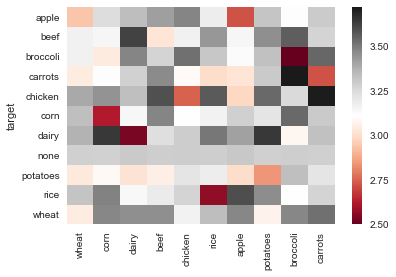

In [67]:
# heatmap to visualize if mean rating is less for people with sensitivity to that specific food
# targets (sensitivities) should be red at their respective food
sns.heatmap(by_targ.mean(),cmap='RdGy')

Export user data to a csv for quick import of data for recommender system

In [68]:
user_data.to_csv('user_data.csv')